In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the DATA SET


In this notebook, I developed a model aimed at predicting flight delays at the Destination Airport. The purpose is to create a Data set which can be used for visualization and model Building so as to predict the Delays of Flights. I did the visualization so as to get better inferences about the data. For, model fitting I have seperated the Dataset into training Data and Testing Data so that prediction can be done on the testing Data. I also showed how to import Tableau and make visualization more crisp and clear.

Technical aspect Covered:

visualization: matplolib, seaborn, Tableau

data manipulation: pandas, numpy

modeling: sklearn

class definition: regression, Boosting, Bagging

For EDA I used some part of Python coding and Tableau Visulization so as to get a brief insight and inference from the data. Various Plots are created so as to get a great idea of whats happening in the Dataset and what is the most important variable affecting the dalays of the airlines. Feature scaling is a method used to normalize the range of independent variables or features of data and this concept is used.



In [2]:
data = pd.read_csv("archive/flights.csv")

/var/folders/2w/hy3qhkf90ld86v626flq0kb80000gn/T/ipykernel_4864/1156145320.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("archive/flights.csv")


In [3]:
airport = pd.read_csv('archive/airports.csv')
airlines = pd.read_csv('archive/airlines.csv')

In [ ]:
data.info()

In [ ]:
data.shape

The Data Contains 31 columns and 1048575 Rows

In [ ]:
data.describe()

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data

From the above table it is clear that data is not properly organised and date is given seperated and many columns have unnecessary data not useful for visualization for which it is required that we clean the data and take only those columns which is of our use.

In [ ]:
airport.isnull().sum()

In [4]:
airport = airport.dropna(subset = ['LATITUDE','LONGITUDE'])

In [ ]:
airport.isnull().sum()

In [ ]:
airport.head(10)

In [ ]:
airlines

In [5]:
Data_NULL = data.isnull().sum()*100/data.shape[0]
Data_NULL

YEAR                    0.000000
MONTH                   0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
TAIL_NUMBER             0.252978
ORIGIN_AIRPORT          0.000000
DESTINATION_AIRPORT     0.000000
SCHEDULED_DEPARTURE     0.000000
DEPARTURE_TIME          1.480526
DEPARTURE_DELAY         1.480526
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
SCHEDULED_TIME          0.000103
ELAPSED_TIME            1.805629
AIR_TIME                1.805629
DISTANCE                0.000000
WHEELS_ON               1.589822
TAXI_IN                 1.589822
SCHEDULED_ARRIVAL       0.000000
ARRIVAL_TIME            1.589822
ARRIVAL_DELAY           1.805629
DIVERTED                0.000000
CANCELLED               0.000000
CANCELLATION_REASON    98.455357
AIR_SYSTEM_DELAY       81.724960
SECURITY_DELAY         81.724960
AIRLINE_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
WEATHER_DE

We can see that 96% of the values in Cancellation reason column are null for which it is of less use while predicting Delays. Some other columns include 78.2% in Air System Delay, Security Delay, Airline Delay, Weather Delay etc. So I am going to create two Dataset which is having no null values one is by removing all the null values irrespective of different types of Delays and other I am going to take the data set with respect to different types of delays. The first Dataset is named as Flights and the other one is named as Flight_Delays.

In [6]:
# Dropping of subset of null values
data1 = data.dropna(subset = ["TAIL_NUMBER",'DEPARTURE_TIME','DEPARTURE_DELAY','TAXI_OUT','WHEELS_OFF','SCHEDULED_TIME',
             'ELAPSED_TIME','AIR_TIME','WHEELS_ON','TAXI_IN','ARRIVAL_TIME','ARRIVAL_DELAY'])

In [ ]:
data1.shape

In [ ]:
data1.isnull().sum()

In [7]:
# Creting Dataset w.r.t different Types of Delays
data11 = data1.dropna(subset = ['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY','LATE_AIRCRAFT_DELAY','WEATHER_DELAY'])
data11 = data11.drop(['YEAR','MONTH','DAY','DAY_OF_WEEK','TAIL_NUMBER','SCHEDULED_DEPARTURE','DEPARTURE_TIME','SCHEDULED_TIME',
                     'SCHEDULED_ARRIVAL','ARRIVAL_TIME','DIVERTED','CANCELLED','CANCELLATION_REASON','FLIGHT_NUMBER','WHEELS_OFF',
                     'WHEELS_ON','AIR_TIME'],axis = 1)

In [43]:
data11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1063439 entries, 27 to 5819071
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   AIRLINE              1063439 non-null  int64  
 1   ORIGIN_AIRPORT       1063439 non-null  int64  
 2   DESTINATION_AIRPORT  1063439 non-null  int64  
 3   DEPARTURE_DELAY      1063439 non-null  float64
 4   TAXI_OUT             1063439 non-null  float64
 5   ELAPSED_TIME         1063439 non-null  float64
 6   DISTANCE             1063439 non-null  int64  
 7   TAXI_IN              1063439 non-null  float64
 8   ARRIVAL_DELAY        1063439 non-null  float64
 9   AIR_SYSTEM_DELAY     1063439 non-null  float64
 10  SECURITY_DELAY       1063439 non-null  float64
 11  AIRLINE_DELAY        1063439 non-null  float64
 12  LATE_AIRCRAFT_DELAY  1063439 non-null  float64
 13  WEATHER_DELAY        1063439 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 121.7 MB


In [8]:
# The other Dataset
Flight_Delays = data11

In [9]:
# Creating Dataset by removing null values by not focussing fully on different types of Delays
data2 = data1.drop(['CANCELLATION_REASON','AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                    'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'],axis = 1)

In [ ]:
data2.isnull().sum()

In [ ]:
data2.shape

In [ ]:
data2.info()

In [ ]:
data2.DEPARTURE_TIME.isnull().sum()

In [ ]:
data2.DEPARTURE_TIME.dtype

In [ ]:
data2.DEPARTURE_TIME

The departure time above is not very much informative so we are going to change it in the datetime format so that we get a better idea of the time.

In [10]:
# Creating a function to change the way of representation of time in the column
def Format_Hourmin(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [11]:
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Actual_Departure']

0          23:54:00
1          00:02:00
2          00:18:00
3          00:15:00
4          00:24:00
             ...   
5819074    23:55:00
5819075    23:55:00
5819076    23:50:00
5819077    23:53:00
5819078    00:14:00
Name: Actual_Departure, Length: 5714008, dtype: object

In [ ]:
data2.columns

In [12]:
# Creating Date in the Datetime format
data2['Date'] = pd.to_datetime(data2[['YEAR','MONTH','DAY']])
data2.Date

0         2015-01-01
1         2015-01-01
2         2015-01-01
3         2015-01-01
4         2015-01-01
             ...    
5819074   2015-12-31
5819075   2015-12-31
5819076   2015-12-31
5819077   2015-12-31
5819078   2015-12-31
Name: Date, Length: 5714008, dtype: datetime64[ns]

In [13]:
data2['Day'] = data2['Date'].dt.day_name()
data2['Day']

0          Thursday
1          Thursday
2          Thursday
3          Thursday
4          Thursday
             ...   
5819074    Thursday
5819075    Thursday
5819076    Thursday
5819077    Thursday
5819078    Thursday
Name: Day, Length: 5714008, dtype: object

In [14]:
# Applying the function to required variables in the dataset
data2['Actual_Departure'] =data1['DEPARTURE_TIME'].apply(Format_Hourmin)
data2['Scheduled_Arrival'] =data1['SCHEDULED_ARRIVAL'].apply(Format_Hourmin)
data2['Scheduled_Departure'] =data1['SCHEDULED_DEPARTURE'].apply(Format_Hourmin)
data2['Actual_Arrival'] =data1['ARRIVAL_TIME'].apply(Format_Hourmin)

# Merging of  3 data sets

Since there are three dataset it is required to merge all the three data set so that we can use it during the visualization in a proper way.

In [15]:
# Merging on AIRLINE and IATA_CODE
data2 = data2.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')

In [16]:
data2 = data2.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [17]:
data2 = data2.rename(columns={"AIRLINE_y":"AIRLINE"})

In [18]:
data2 = data2.merge(airport, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE', how='inner')
data2 = data2.merge(airport, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE', how='inner')

In [ ]:
data2.columns

In [19]:
data2 = data2.drop(['LATITUDE_x', 'LONGITUDE_x',
       'STATE_y', 'COUNTRY_y', 'LATITUDE_y', 'LONGITUDE_y','STATE_x', 'COUNTRY_x'], axis=1)

In [20]:
data2 = data2.rename(columns={'IATA_CODE_x':'Org_Airport_Code','AIRPORT_x':'Org_Airport_Name','CITY_x':'Origin_city',
                             'IATA_CODE_y':'Dest_Airport_Code','AIRPORT_y':'Dest_Airport_Name','CITY_y':'Destination_city'})

In [ ]:
data2

In [21]:
# we are taking the required data into Account for visualization and the Analysis
ReqdData = pd.DataFrame(data2[['AIRLINE','Org_Airport_Name','Origin_city',
                               'Dest_Airport_Name','Destination_city','ORIGIN_AIRPORT',
                               'DESTINATION_AIRPORT','DISTANCE','Actual_Departure','Date','Day',
                               'Scheduled_Departure','DEPARTURE_DELAY','Actual_Arrival','Scheduled_Arrival','ARRIVAL_DELAY',
                              'SCHEDULED_TIME','ELAPSED_TIME','AIR_TIME','TAXI_IN','TAXI_OUT','DIVERTED',]])

In [ ]:
data2.DEPARTURE_TIME.dtype

In [22]:
ReqdData = ReqdData.dropna(subset = ['Actual_Departure','Actual_Arrival'])

In [ ]:
ReqdData.info()

In [23]:
# Cleaned Dataset for visualization and Analysis
Flights = ReqdData
Flights

,AIRLINE,Org_Airport_Name,Origin_city,Dest_Airport_Name,Destination_city,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE,Actual_Departure,Date,...,DEPARTURE_DELAY,Actual_Arrival,Scheduled_Arrival,ARRIVAL_DELAY,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,TAXI_IN,TAXI_OUT,DIVERTED
0,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,Seattle-Tacoma International Airport,Seattle,ANC,SEA,1448,23:54:00,2015-01-01,...,-11.0,04:08:00,04:30:00,-22.0,205.0,194.0,169.0,4.0,21.0,0
1,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Palm Beach International Airport,West Palm Beach,LAX,PBI,2330,00:02:00,2015-01-01,...,-8.0,07:41:00,07:50:00,-9.0,280.0,279.0,263.0,4.0,12.0,0
2,US Airways Inc.,San Francisco International Airport,San Francisco,Charlotte Douglas International Airport,Charlotte,SFO,CLT,2296,00:18:00,2015-01-01,...,-2.0,08:11:00,08:06:00,5.0,286.0,293.0,266.0,11.0,16.0,0
3,American Airlines Inc.,Los Angeles International Airport,Los Angeles,Miami International Airport,Miami,LAX,MIA,2342,00:15:00,2015-01-01,...,-5.0,07:56:00,08:05:00,-9.0,285.0,281.0,258.0,8.0,15.0,0
4,Alaska Airlines Inc.,Seattle-Tacoma International Airport,Seattle,Ted Stevens Anchorage International Airport,Anchorage,SEA,ANC,1448,00:24:00,2015-01-01,...,-1.0,02:59:00,03:20:00,-21.0,235.0,215.0,199.0,5.0,11.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5221995,JetBlue Airways,Los Angeles International Airport,Los Angeles,Gen. Edward Lawrence Logan International Airport,Boston,LAX,BOS,2611,23:55:00,2015-12-31,...,-4.0,07:53:00,08:19:00,-26.0,320.0,298.0,272.0,4.0,22.0,0
5221996,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,Mercedita Airport,Ponce,JFK,PSE,1617,23:55:00,2015-12-31,...,-4.0,04:30:00,04:46:00,-16.0,227.0,215.0,195.0,3.0,17.0,0
5221997,JetBlue Airways,John F. Kennedy International Airport (New Yor...,New York,Luis Muñoz Marín International Airport,San Juan,JFK,SJU,1598,23:50:00,2015-12-31,...,-9.0,04:32:00,04:40:00,-8.0,221.0,222.0,197.0,8.0,17.0,0
5221998,JetBlue Airways,Orlando International Airport,Orlando,Luis Muñoz Marín International Airport,San Juan,MCO,SJU,1189,23:53:00,2015-12-31,...,-6.0,03:30:00,03:40:00,-10.0,161.0,157.0,144.0,3.0,10.0,0


In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Origin_city'], data = Flights,
              order=Flights['Origin_city'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

# The Figure shows that Atlanta has the highest count of flight from origin city 

In [ ]:
plt.figure(figsize=(10, 10))
axis = sns.countplot(x=Flights['Org_Airport_Name'], data = Flights,
              order=Flights['Org_Airport_Name'].value_counts().iloc[:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
axis = plt.subplots(figsize=(10,14))
Name = Flights["AIRLINE"].unique()
size = Flights["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [ ]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = Flights, dodge=True, jitter=True
            )
plt.show()

American Airlines Inc has the highest Arrival Delay.

# Prediction

In [ ]:
Flights.head()

In [24]:
# Dropping unncecssary columns before prediction
Flights1 = Flights.drop(['Org_Airport_Name','Origin_city','Dest_Airport_Name','Destination_city'],axis = 1)

In [ ]:
Flights1.columns

In [ ]:
# To check the Distribution of Air Time
sns.displot(Flights1['AIR_TIME'])
plt.show()

In [ ]:
# To check the Distribution of Elapsed Time
sns.displot(Flights1['ELAPSED_TIME'])
plt.show()

In [ ]:
# To check the Distribution of Taxi IN
sns.displot(Flights1['TAXI_IN'])
plt.show()

In [ ]:
# To check the Distribution of Taxi out
sns.displot(Flights1['TAXI_OUT'])
plt.show()

In [25]:
# importing Various regression algorithms 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [26]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(estimator=Rid,random_state=2)

In [27]:
le = LabelEncoder()

In [28]:
# Label encoding features to change categorical variables into numerical one
Flights1['AIRLINE']= le.fit_transform(Flights1['AIRLINE'])
Flights1['ORIGIN_AIRPORT'] = le.fit_transform(Flights1['ORIGIN_AIRPORT'])
Flights1['DESTINATION_AIRPORT'] = le.fit_transform(Flights1['DESTINATION_AIRPORT'])
Flights1['Day'] = le.fit_transform(Flights1['Day'])

In [29]:
Flights1 = Flights1.drop(['Scheduled_Departure','Scheduled_Arrival','Actual_Arrival','Date','Actual_Departure'], axis = 1)

In [30]:
Flights1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5219244 entries, 0 to 5221999
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   AIRLINE              int64  
 1   ORIGIN_AIRPORT       int64  
 2   DESTINATION_AIRPORT  int64  
 3   DISTANCE             int64  
 4   Day                  int64  
 5   DEPARTURE_DELAY      float64
 6   ARRIVAL_DELAY        float64
 7   SCHEDULED_TIME       float64
 8   ELAPSED_TIME         float64
 9   AIR_TIME             float64
 10  TAXI_IN              float64
 11  TAXI_OUT             float64
 12  DIVERTED             int64  
dtypes: float64(7), int64(6)
memory usage: 557.5 MB


In [31]:
X = Flights1.drop('ARRIVAL_DELAY',axis = 1)
X.shape

(5219244, 12)

In [32]:
y = Flights1['ARRIVAL_DELAY']
y.head()

0   -22.0
1    -9.0
2     5.0
3    -9.0
4   -21.0
Name: ARRIVAL_DELAY, dtype: float64

In [33]:
# Splitting into train and test data set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [34]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Testing

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Models
import xgboost as xgb
import lightgbm as lgb

# -----------------------
# XGBoost Regressor
# -----------------------
xgb_model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("R2 :", r2_score(y_test, y_pred_xgb))
print("-" * 30)

# -----------------------
# LightGBM Regressor
# -----------------------
lgb_model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_lgb))
print("MSE:", mean_squared_error(y_test, y_pred_lgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))
print("R2 :", r2_score(y_test, y_pred_lgb))


XGBoost Regressor
MAE: 2.0400175599110377
MSE: 126.20398250861282
RMSE: 11.234054588999149
R2 : 0.9691270884277211
------------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2576
[LightGBM] [Info] Number of data points in the train set: 744407, number of used features: 13
[LightGBM] [Info] Start training from score 58.901824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Regressor
MAE: 1.4926011815305582
MSE: 11.391384092056374
RMSE

# Model fitting and results

In [ ]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin], 
     ['Lasso','Linear Regression','Ridge','Decision Tree Regressor','Random forest Regressor','Boosted Linear']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

In [34]:
for model, name in zip([Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Boosted Lasso
Mean Absolute Error: 2.553949085281589
Mean Squared Error: 12.798185745087803
Root Mean Squared Error: 3.5774552051825617
R2 :  0.9919523756541827

Boosted Ridge
Mean Absolute Error: 5.5915336047343736e-05
Mean Squared Error: 2.560039796335077e-06
Root Mean Squared Error: 0.0016000124363063797
R2 :  0.9999999983902219

Bagged Linear
Mean Absolute Error: 1.2773237583243031e-06
Mean Squared Error: 2.554647094663707e-06
Root Mean Squared Error: 0.0015983263417286555
R2 :  0.999999998393613

Bagged Lasso
Mean Absolute Error: 7.302378488702507
Mean Squared Error: 97.72032869931553
Root Mean Squared Error: 9.885359310582269
R2 :  0.9385525017384809

Bagged Ridge
Mean Absolute Error: 0.00017656528850261264
Mean Squared Error: 2.6096217457255913e-06
Root Mean Squared Error: 0.001615432371139563
R2 :  0.9999999983590443



# Model Analysis

In [ ]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# When Flight_Delays is taken, where I took all the different Delays into Concern.

I removed the null values present in all the different types of Delays and proceeded with prediction of the Arrival Delays. 

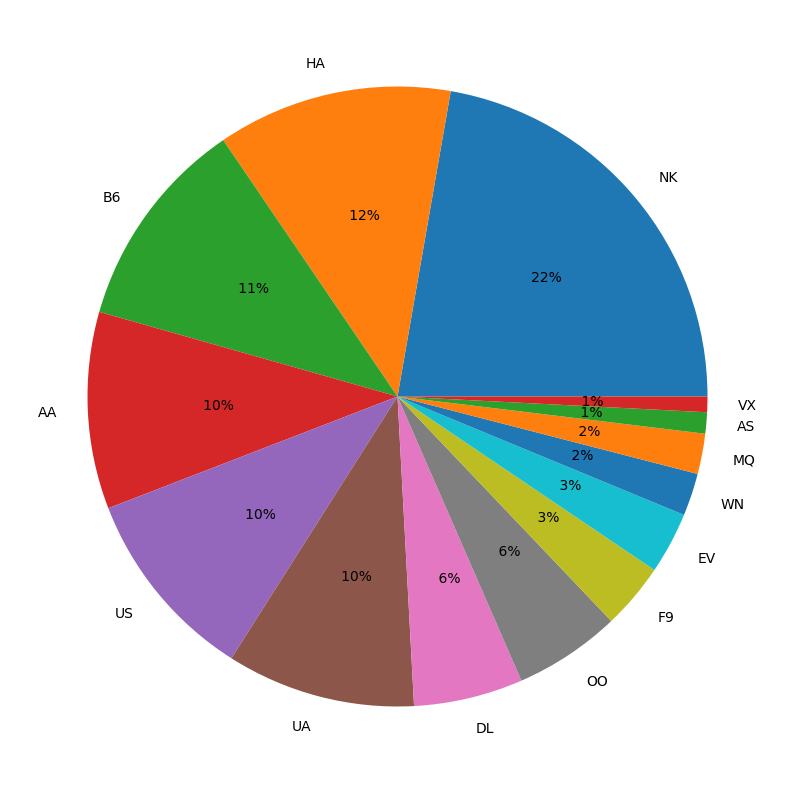

In [35]:
axis = plt.subplots(figsize=(10,14))
Name = Flight_Delays["AIRLINE"].unique()
size = Flight_Delays["AIRLINE"].value_counts()
plt.pie(size,labels=Name,autopct='%5.0f%%')
plt.show()

In [36]:
Flight_Delays

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,TAXI_OUT,ELAPSED_TIME,DISTANCE,TAXI_IN,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
27,NK,MSP,FLL,12.0,14.0,220.0,1487,40.0,25.0,25.0,0.0,0.0,0.0,0.0
30,NK,PHX,ORD,72.0,9.0,175.0,1440,10.0,43.0,43.0,0.0,0.0,0.0,0.0
35,HA,LAS,HNL,0.0,16.0,385.0,2762,8.0,15.0,0.0,0.0,15.0,0.0,0.0
50,B6,BQN,MCO,-3.0,25.0,196.0,1129,11.0,20.0,20.0,0.0,0.0,0.0,0.0
52,B6,SJU,MCO,95.0,9.0,175.0,1189,3.0,85.0,0.0,0.0,85.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819023,B6,MCO,BQN,21.0,10.0,162.0,1129,7.0,20.0,0.0,0.0,17.0,3.0,0.0
5819051,AS,SEA,MSP,16.0,10.0,204.0,1399,5.0,28.0,12.0,0.0,16.0,0.0,0.0
5819057,NK,FLL,BQN,13.0,15.0,155.0,982,19.0,28.0,15.0,0.0,13.0,0.0,0.0
5819069,B6,LAS,JFK,159.0,34.0,282.0,2248,5.0,159.0,0.0,0.0,159.0,0.0,0.0


In [37]:
Flight_Delays['ORIGIN_AIRPORT'] = Flight_Delays['ORIGIN_AIRPORT'].astype(str)
Flight_Delays['DESTINATION_AIRPORT'] = Flight_Delays['DESTINATION_AIRPORT'].astype(str)

In [38]:
Flight_Delays['AIRLINE']= le.fit_transform(Flight_Delays['AIRLINE'])
Flight_Delays['ORIGIN_AIRPORT'] = le.fit_transform(Flight_Delays['ORIGIN_AIRPORT'])
Flight_Delays['DESTINATION_AIRPORT'] = le.fit_transform(Flight_Delays['DESTINATION_AIRPORT'])

In [39]:
X = Flight_Delays.drop('ARRIVAL_DELAY',axis = 1)
X.shape
y = Flight_Delays['ARRIVAL_DELAY']
y.head()

27    25.0
30    43.0
35    15.0
50    20.0
52    85.0
Name: ARRIVAL_DELAY, dtype: float64

In [40]:
# Splitting the Data into Training and Testing set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)

In [41]:
# Scalling of the Data
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

# Model fitting and results

In [42]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

Lasso
Mean Absolute Error: 4.067457537318067
Mean Squared Error: 31.712789049437035
Root Mean Squared Error: 5.631410928838086
R2 :  0.9922421930546701

Linear Regression
Mean Absolute Error: 2.1337591762413303e-13
Mean Squared Error: 1.219519222925732e-25
Root Mean Squared Error: 3.4921615411170944e-13
R2 :  1.0

Ridge
Mean Absolute Error: 0.0005736029989325425
Mean Squared Error: 5.776080185214134e-07
Root Mean Squared Error: 0.0007600052753247266
R2 :  0.9999999998587015

Random forest Regressor
Mean Absolute Error: 0.7785049775571102
Mean Squared Error: 12.243906567366283
Root Mean Squared Error: 3.4991294013463237
R2 :  0.9970048089034929

Decision Tree Regressor
Mean Absolute Error: 0.5726401113367938
Mean Squared Error: 5.897432342837082
Root Mean Squared Error: 2.4284629589180646
R2 :  0.998557328353632

Boosted Linear
Mean Absolute Error: 4.347222115039707e-13
Mean Squared Error: 2.8406952504859664e-25
Root Mean Squared Error: 5.329817305017092e-13
R2 :  1.0

Boosted Lasso
Mea

# Model Analysis

In [ ]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

# Conclusion

We can see that maximum arrival Delays are dependent on the Departure Delays of the Airport. The first part is dealt with cleaning and exploration of the data set to get more insights and the second part dealt with the sitting of the model to predict the delays. For exploratory Analysis I used visualization tools like tableau and seaborn as well as matplotlib. The Second part dealt with the model fitting and predicting the Arrival delays of the airlines.

We can see that departure delay is the main problem which is creating Delay in the aviation industry. Departure Delays can be caused due Security Delay, Airline System Delays, Airlines Delay etc. The Delays affect the revenue of the company to a great extent so the delays has to be reduced as much as possible so as to increase the profitability in the Airline Industry. Customer Satisfaction will also be greatly enhanced if the delays can be brought down as low as possible.